<a href="https://colab.research.google.com/github/Soooheee/network/blob/main/hiphop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

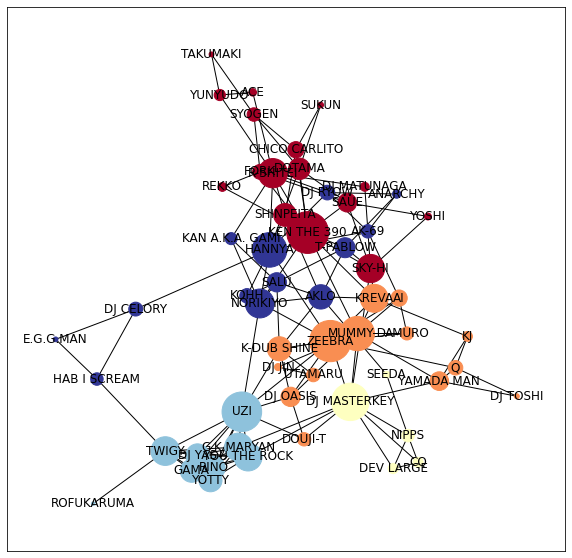

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

plt.figure(figsize=(10, 10))
df_name=pd.read_csv("name.csv")
df_ft=pd.read_csv("feat.csv")

vector={}
for i in range(len(df_name)):
  vector[df_name.iloc[i,0]] = []

for i  in range(len(df_name)):
  for j in range(len(df_name)):
    if df_name.iloc[i,1]==df_name.iloc[j,1] and i!=j:
      vector[df_name.iloc[i,0]].append(df_name.iloc[j,0])

for i  in range(len(df_ft)):
  vector[df_ft.iloc[i,0]].append(df_ft.iloc[i,1])

G= nx.Graph(vector) 

# モジュラリティ最大の分割
partition = community_louvain.best_partition(G)
#媒介中心性を求める
between_cent = nx.communicability_betweenness_centrality(G)
node_size = [5000 * size for size in list(between_cent.values())]
#形を整えて、出力
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos, node_color=[partition[node] for node in G.nodes()],node_size=node_size, cmap=plt.cm.RdYlBu)